In [52]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import numpy as np
from astropy.time import Time
from astropy.coordinates import get_sun,get_moon, SkyCoord

Text(12741824.496167805, 7225882.753132938, '  moon')

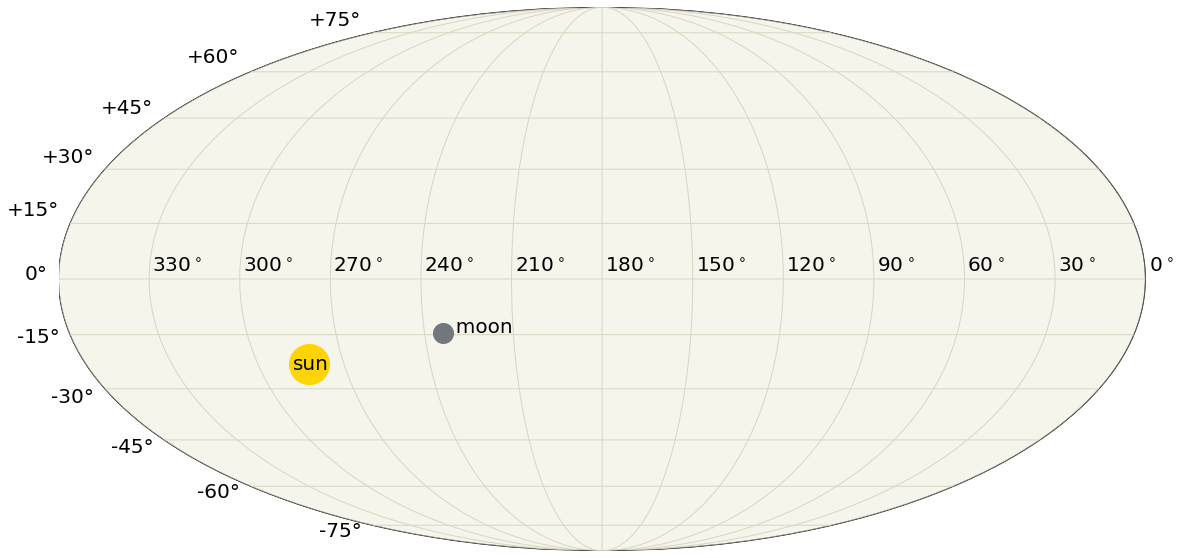

In [53]:
time = Time('2019-01-02')
tmp_sun = get_sun(time)
sun_position = SkyCoord(tmp_sun.ra.deg,tmp_sun.dec.deg,unit='deg', frame='icrs')
sun_ra,sun_dec = map(sun_position.ra.value,sun_position.dec.value)


tmp_moon = get_moon(time)
moon_position = SkyCoord(tmp_moon.ra.deg,tmp_moon.dec.deg,unit='deg', frame='icrs')
moon_ra,moon_dec = map(moon_position.ra.value,moon_position.dec.value)



projection = 'moll'
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
map = Basemap(projection=projection,lat_0=0,lon_0=180,
              resolution='l',area_thresh=1000.0,celestial=True,ax=ax)
map.drawmeridians(np.arange(0, 360, 30), dashes=[1,0],color='#d9d6c3')
map.drawparallels(np.arange(-90, 90, 15), dashes=[1,0],labels=[1,0,0,1],
                  color='#d9d6c3',size=20)
map.drawmapboundary(fill_color='#f6f5ec')
if projection == 'moll':
    az1 = np.arange(0, 360, 30)
    zen1 = np.zeros(az1.size) + 2
    azname = []
    for i in az1:
        azname.append(r'${\/%s\/^{\circ}}$' % str(i))
    x1, y1 = map(az1, zen1)
    for index, value in enumerate(az1):
        plt.text(x1[index], y1[index], azname[index], size=20)
map.plot(sun_ra,sun_dec ,'o',color='#ffd400',markersize=40)
plt.text(sun_ra-550000,sun_dec-200000,'sun',size=20)

map.plot(moon_ra,moon_dec,'o',color = '#72777b',markersize = 20)
plt.text(moon_ra,moon_dec,'  moon',size = 20)